In [1]:
# Loading important Libraries.....
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# .....................Importing Important libraries for Classification Models................
# Models from Scikit-Learn...
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Ensemble Techniques...
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Model selection libraries...
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split
from sklearn.model_selection import GridSearchCV

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

# Importing Warnings
import warnings
warnings.filterwarnings('ignore') 

In [2]:
# Reading the csv file...
df=pd.read_csv('Automob_Insurance_Fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


## Understanding the Data               

1) Fetaures:
   >> months_as_customer                   
age             
policy_number                 
policy_bind_date              
policy_state              
policy_csl                      
policy_deductable                 
policy_annual_premium                   
umbrella_limit               
insured_zip              
insured_sex                                                 
insured_education_level                       
insured_occupation                             
insured_hobbies                                
insured_relationship                            
capital-gains                                       
capital-loss                                     
incident_date                                    
incident_type                                    
collision_type                                     
incident_severity                                   
authorities_contacted                            
incident_state                                      
incident_city                                       
incident_location                                          
incident_hour_of_the_day                         
number_of_vehicles_involved                     
property_damage                                   
bodily_injuries                                  
witnesses               
police_report_available                  
total_claim_amount             
injury_claim              
property_claim                 
vehicle_claim                  
auto_make             
auto_model              
auto_year                
fraud_reported                        

2) Target:                               
   >> fraud_reported                   
   
3) we have to predict the insurance fraud in the Automobile insurance dataset, we can see that the data is categorical and thus i will use Logistic Regresiona nd Classification models for Model Training.                

In [3]:
# Checking the shape of Dataset.
# shape(rows,columns) =>>> It means 1000 rows and 40 columns.
df.shape

(1000, 40)

In [4]:
# Dropping duplicates if any...
df.drop_duplicates()
# No duplicates entries found

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [5]:
# Printed the first 10 rows of the dataset to check whether the data is loaded succesfully in the dataframe.
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [6]:
# checking the Features information regarding the dataset....
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
months_as_customer             1000 non-null int64
age                            1000 non-null int64
policy_number                  1000 non-null int64
policy_bind_date               1000 non-null object
policy_state                   1000 non-null object
policy_csl                     1000 non-null object
policy_deductable              1000 non-null int64
policy_annual_premium          1000 non-null float64
umbrella_limit                 1000 non-null int64
insured_zip                    1000 non-null int64
insured_sex                    1000 non-null object
insured_education_level        1000 non-null object
insured_occupation             1000 non-null object
insured_hobbies                1000 non-null object
insured_relationship           1000 non-null object
capital-gains                  1000 non-null int64
capital-loss                   1000 non-null int64
incident_date    

Features Information:           
1) No null data.           
2) float datatype= 2            
3) int datatype= 17           
4) object datatype= 21       

In [7]:
# Checking the null values....
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# As we can see that _c39 is only having null values , thus we can delete that Feature.
df.drop(['_c39'],axis=1,inplace=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,N
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,N


In [9]:
# As we can see that some places have an Unknown symbol '?' thus replacing it with NaN so that we can replace it...
df.replace('?',np.NaN,inplace=True)

In [10]:
# Checking Null Values...
df.isnull().sum()
# Thus we can see that Three Features have null values which are: 'collison_type', 'property_damage', 'police_report_available',
# All the Features having null values are object type.

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [11]:
# Replacing the null values with the Most Frequent occuring value....
df.fillna('most_frequent',inplace=True)

In [12]:
# checking the null values after filling up....
df.isnull().sum()
# Thus all the null values are replaced.

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [13]:
# Checking the columns....
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [14]:
# Checking the no. of different unique values present in the each Feature of the Dataset......
for i in df.columns.values:
    print('Number of unique values in {} are {} '.format(i,df[i].nunique()))

Number of unique values in months_as_customer are 391 
Number of unique values in age are 46 
Number of unique values in policy_number are 1000 
Number of unique values in policy_bind_date are 951 
Number of unique values in policy_state are 3 
Number of unique values in policy_csl are 3 
Number of unique values in policy_deductable are 3 
Number of unique values in policy_annual_premium are 991 
Number of unique values in umbrella_limit are 11 
Number of unique values in insured_zip are 995 
Number of unique values in insured_sex are 2 
Number of unique values in insured_education_level are 7 
Number of unique values in insured_occupation are 14 
Number of unique values in insured_hobbies are 20 
Number of unique values in insured_relationship are 6 
Number of unique values in capital-gains are 338 
Number of unique values in capital-loss are 354 
Number of unique values in incident_date are 60 
Number of unique values in incident_type are 4 
Number of unique values in collision_type 

In [15]:
# Statistical Features Information......
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


##### Out of the 18 numerical features, 4 Features are Left skewed, and rest are Right Skewed ... 

In [16]:
# Checking the correlation.....
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


# Univariant Analysis

months_as_customer                AxesSubplot(0.125,0.749828;0.168478x0.130172)
age                            AxesSubplot(0.327174,0.749828;0.168478x0.130172)
policy_number                  AxesSubplot(0.529348,0.749828;0.168478x0.130172)
policy_deductable              AxesSubplot(0.731522,0.749828;0.168478x0.130172)
policy_annual_premium             AxesSubplot(0.125,0.593621;0.168478x0.130172)
umbrella_limit                 AxesSubplot(0.327174,0.593621;0.168478x0.130172)
insured_zip                    AxesSubplot(0.529348,0.593621;0.168478x0.130172)
capital-gains                  AxesSubplot(0.731522,0.593621;0.168478x0.130172)
capital-loss                      AxesSubplot(0.125,0.437414;0.168478x0.130172)
incident_hour_of_the_day       AxesSubplot(0.327174,0.437414;0.168478x0.130172)
number_of_vehicles_involved    AxesSubplot(0.529348,0.437414;0.168478x0.130172)
bodily_injuries                AxesSubplot(0.731522,0.437414;0.168478x0.130172)
witnesses                         AxesSu

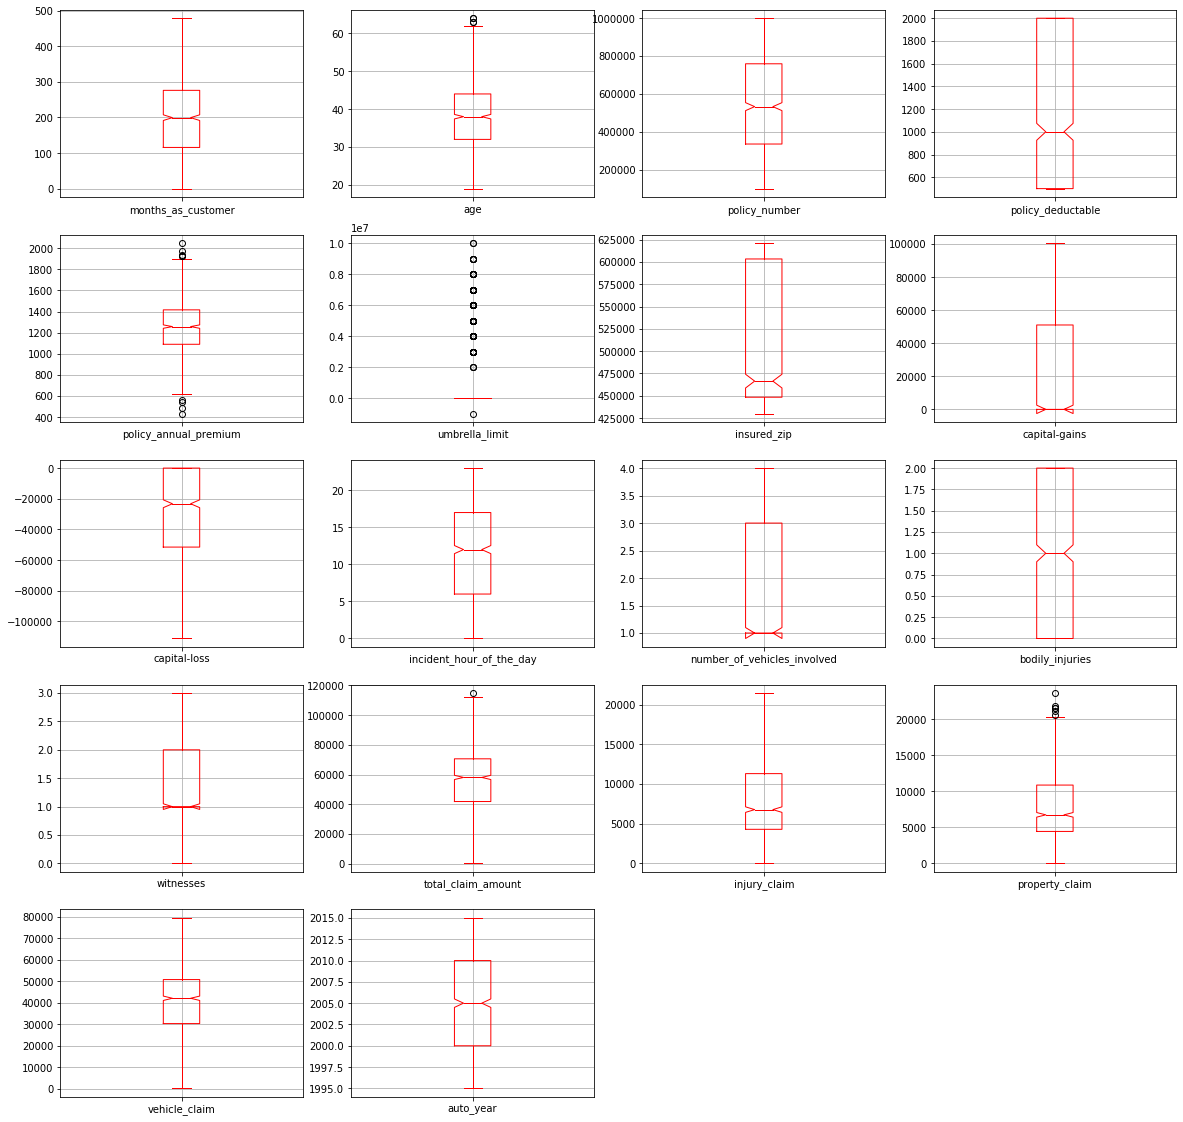

In [17]:
# Plotting the boxplot in order to check few statistical values and outliers
df.plot(kind='box', subplots=True, layout=(5,4),figsize=(20,20), grid=True, notch=True, color='red',legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001919FC71D08>,
      dtype=object)

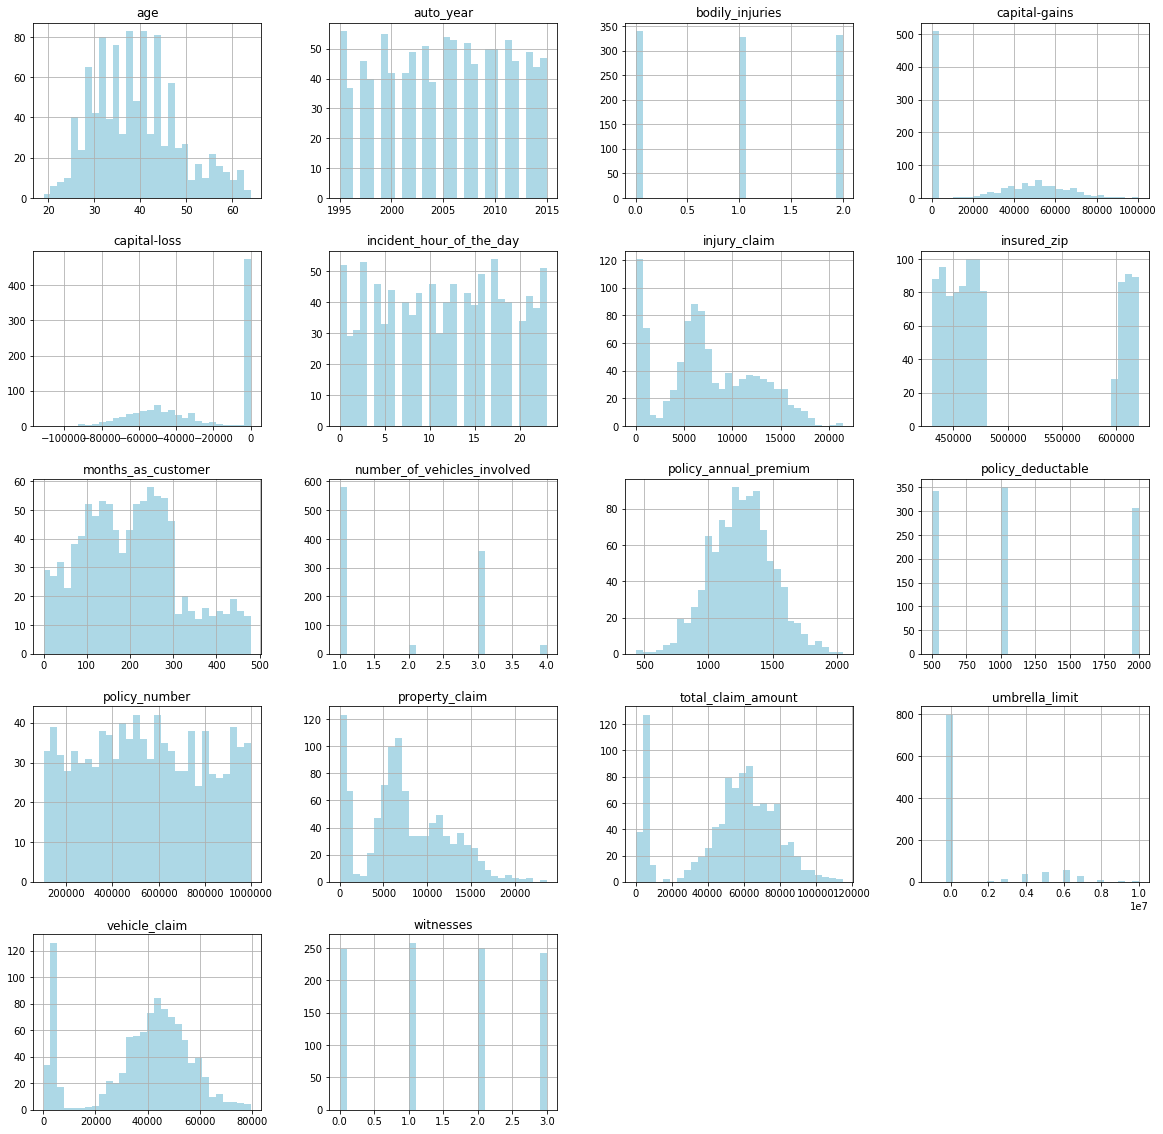

In [18]:
 #Checking the Distribution using the histogram plot.
df.hist(figsize=(20,20),grid=True,layout=(5,4),bins=30,color='lightblue') 

##### Out of the 18 numerical features, 4 Features are Left skewed, rest are right skewed.

In [19]:
# Counting Number of persons who have done fraud.......
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

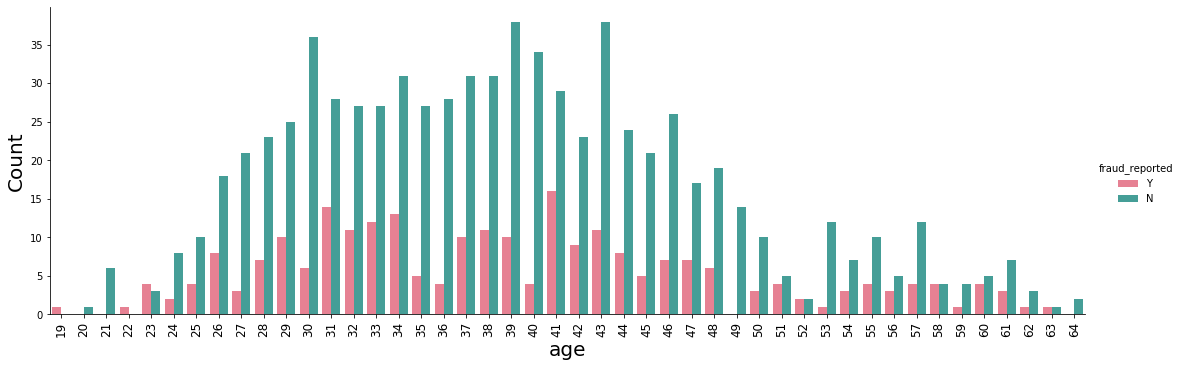

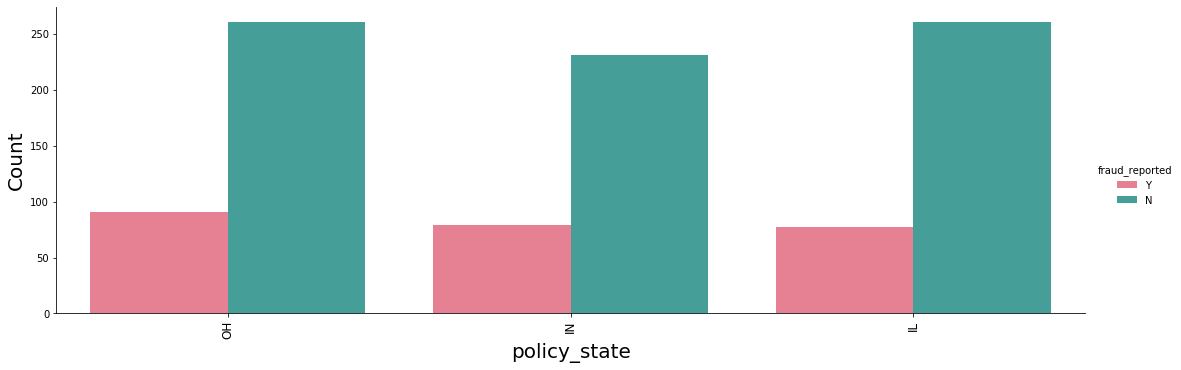

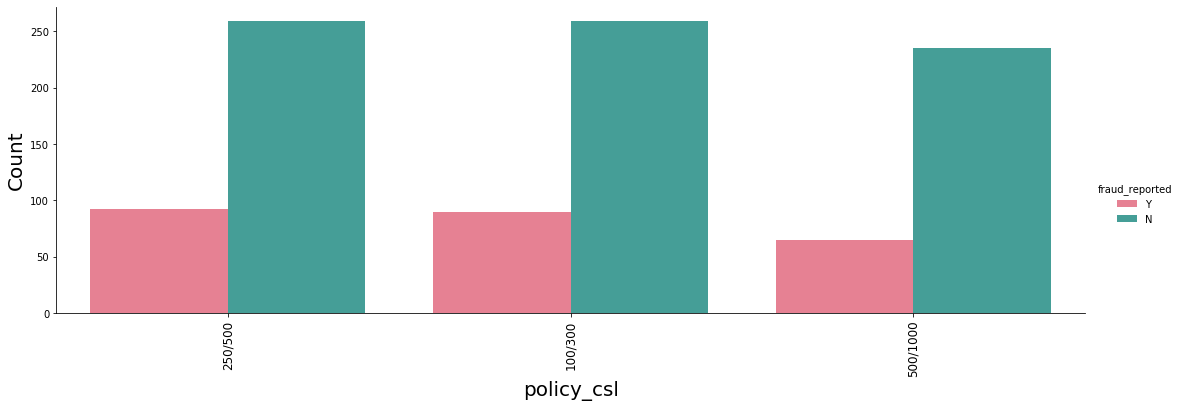

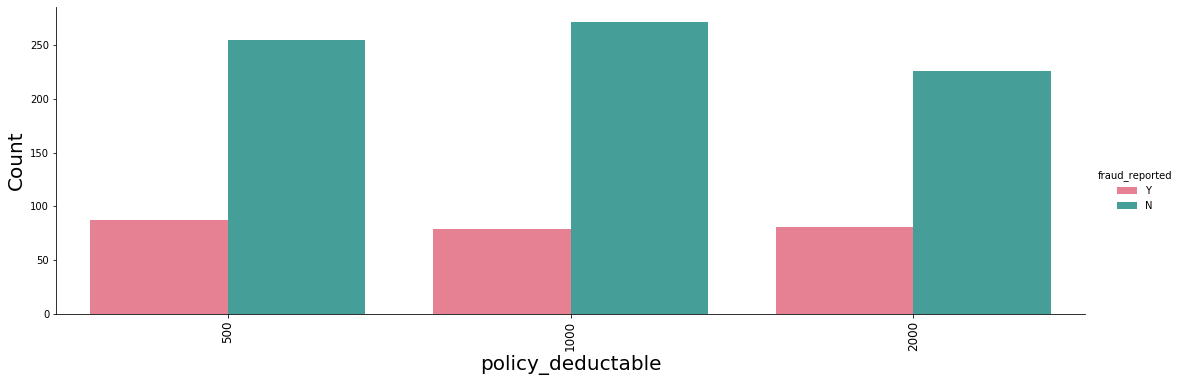

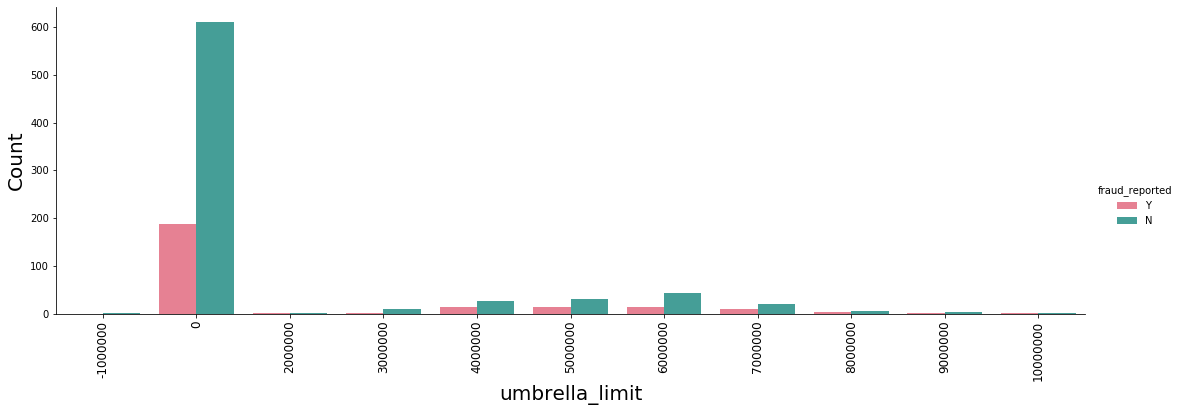

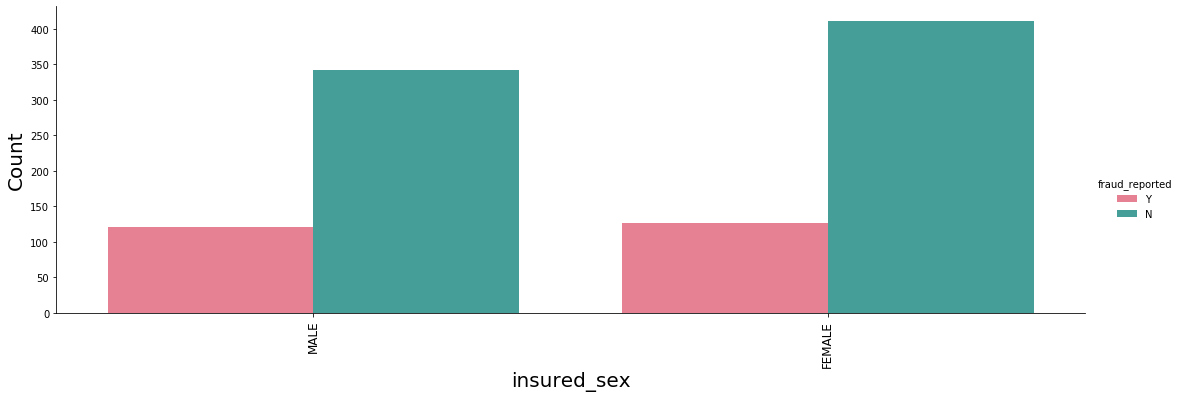

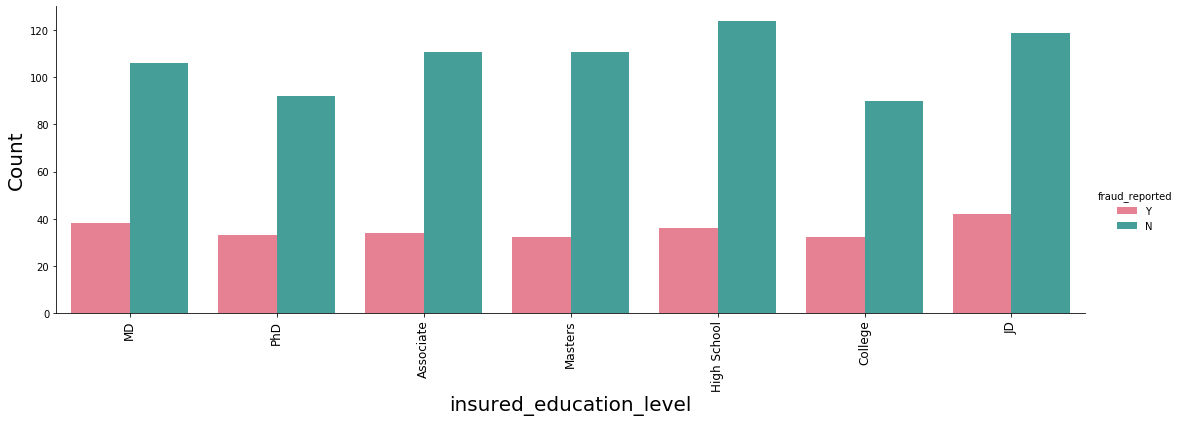

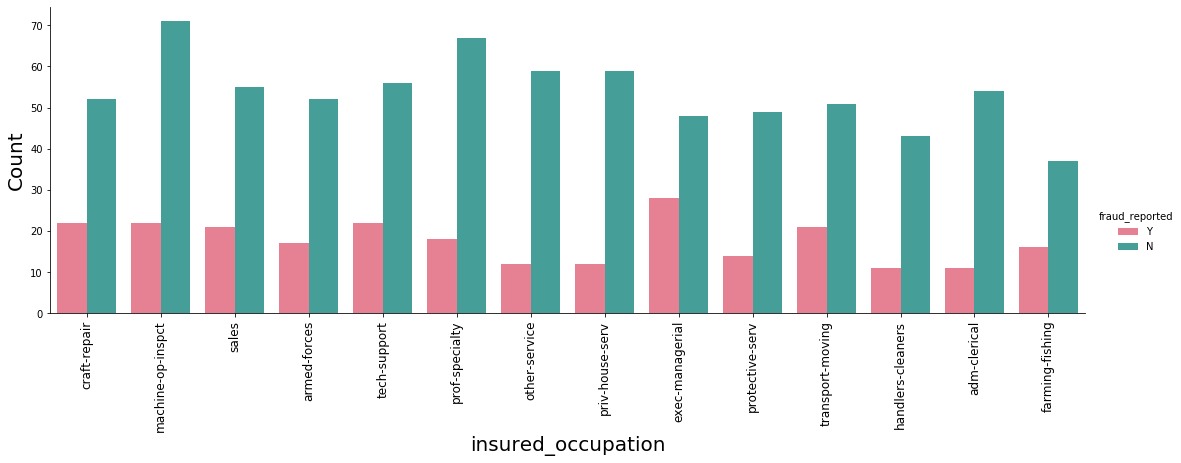

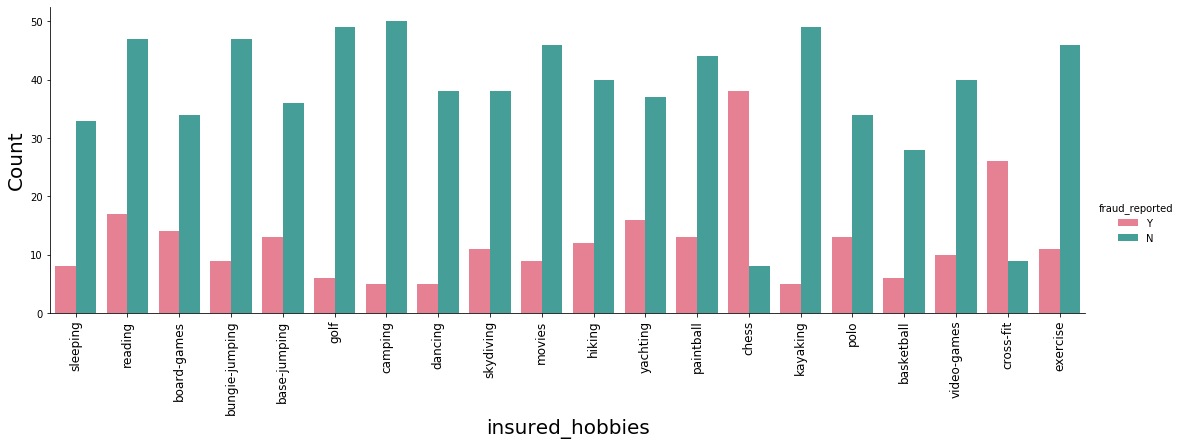

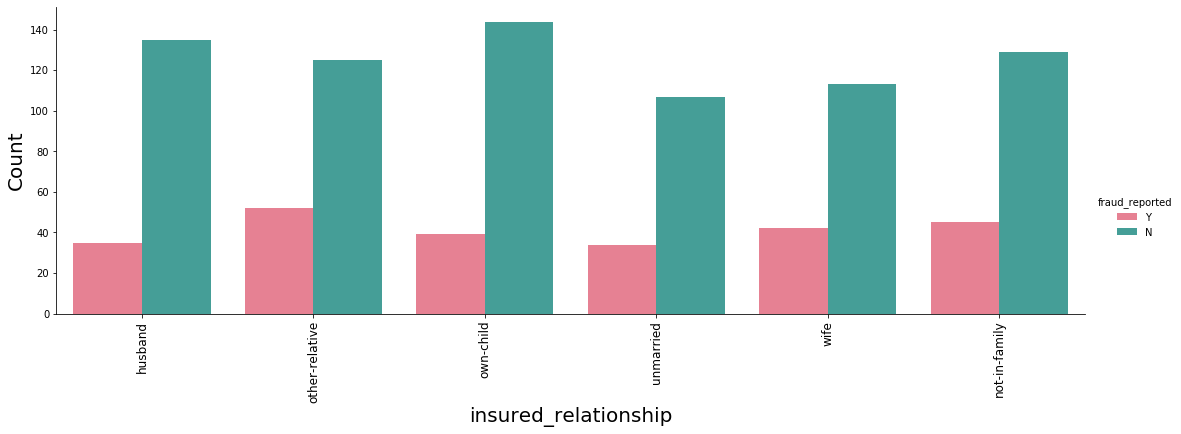

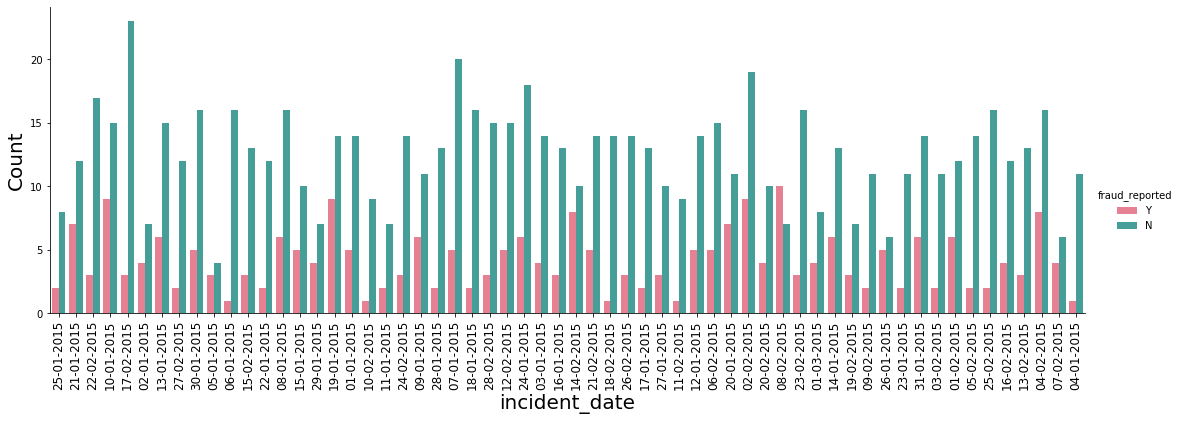

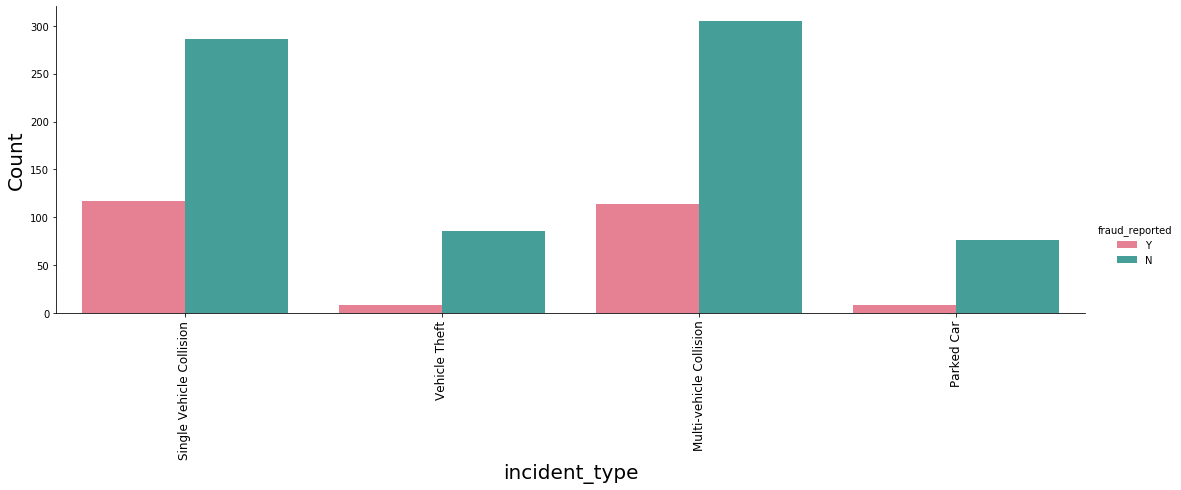

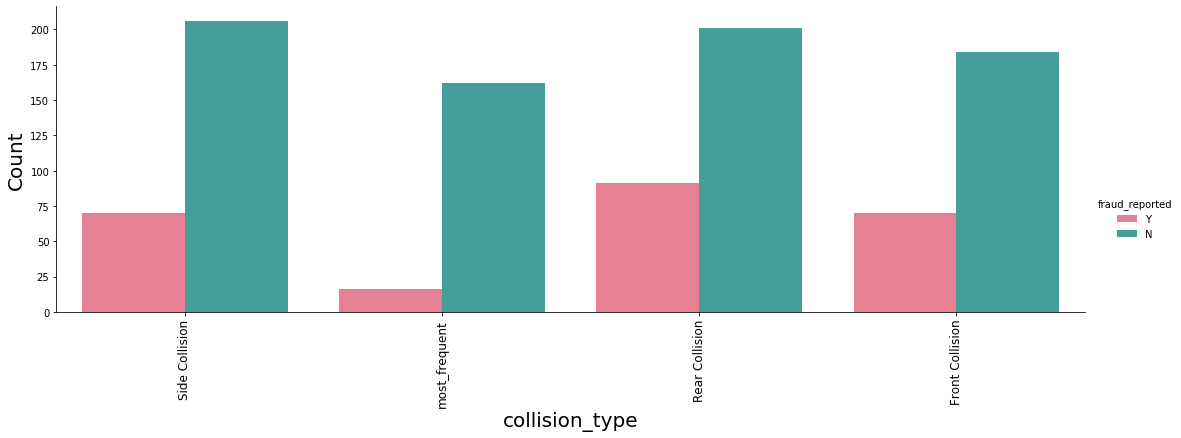

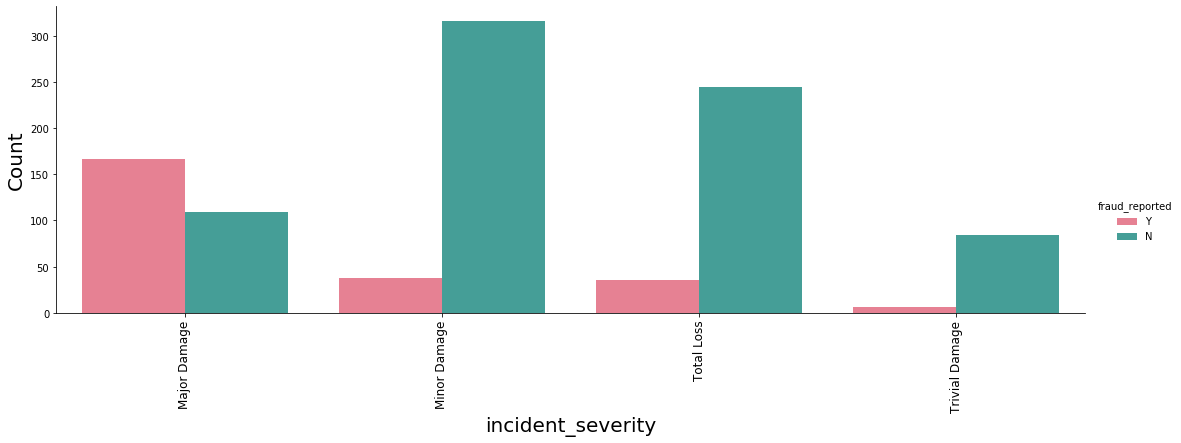

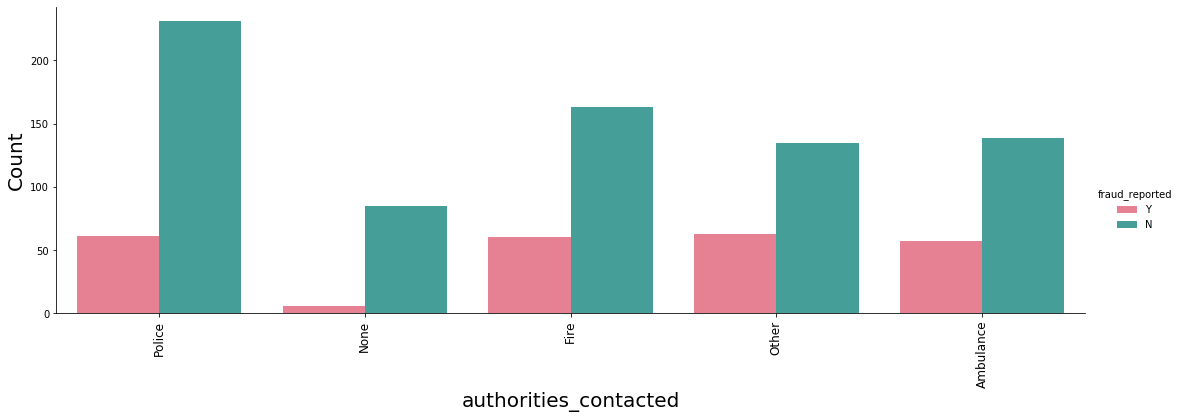

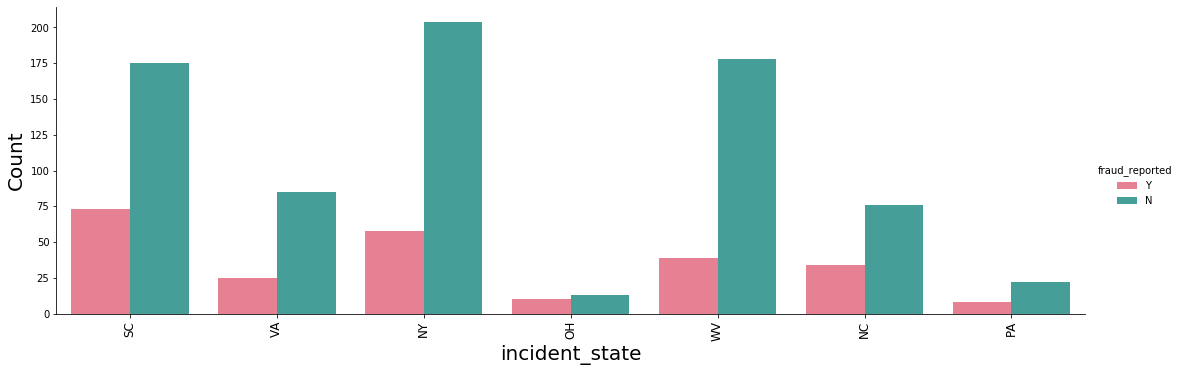

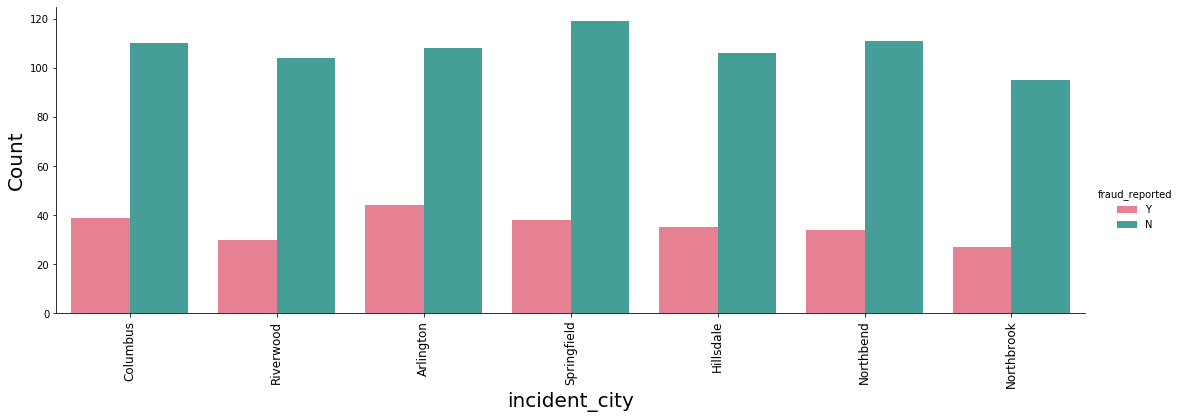

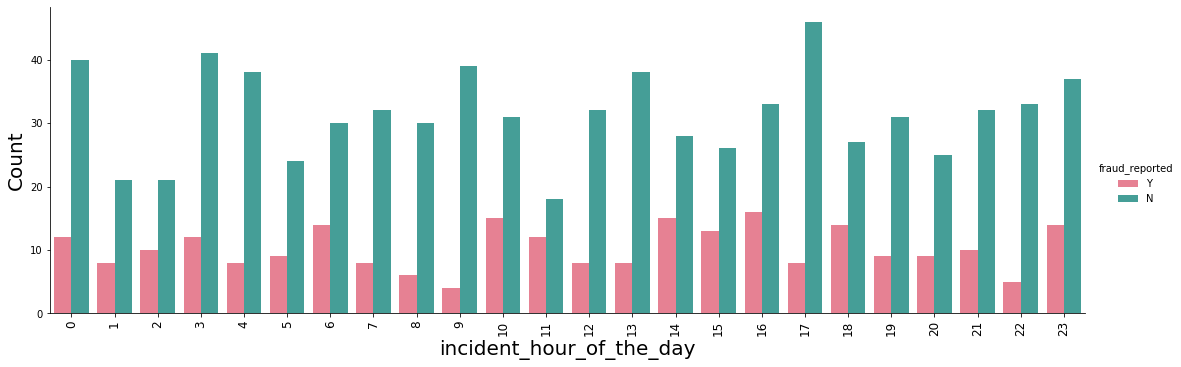

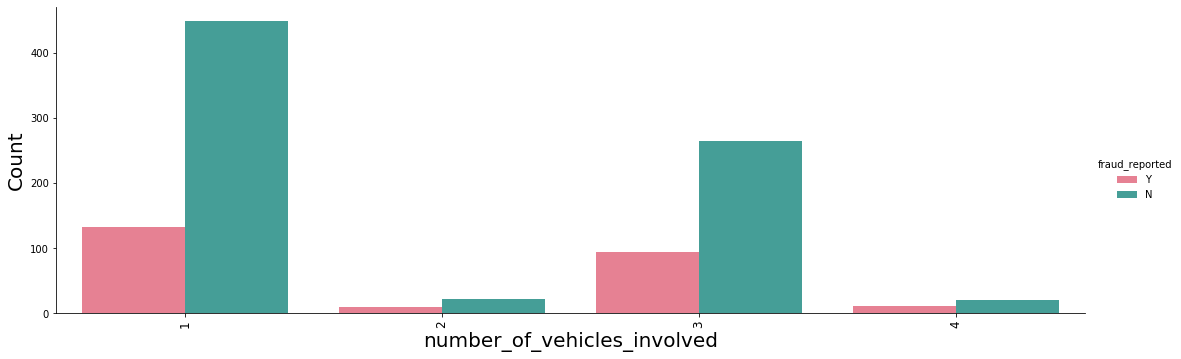

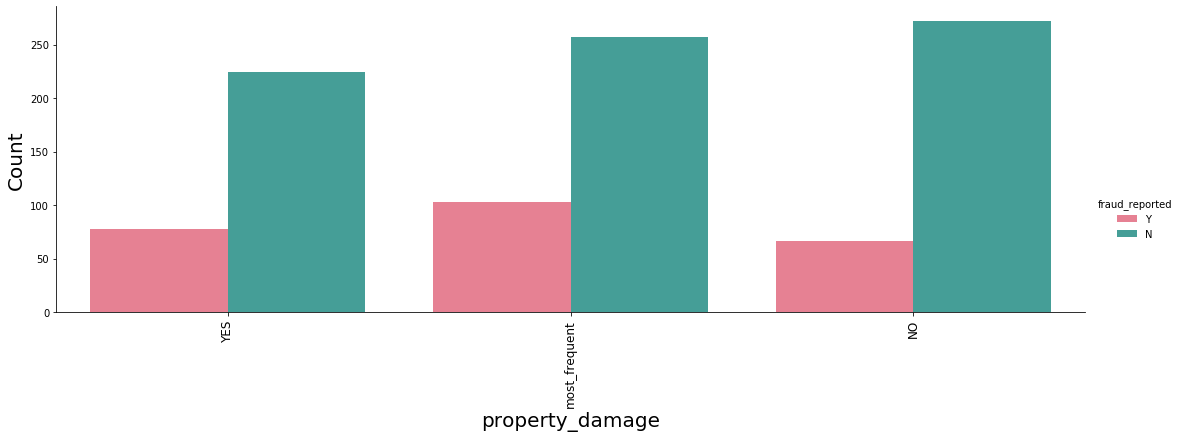

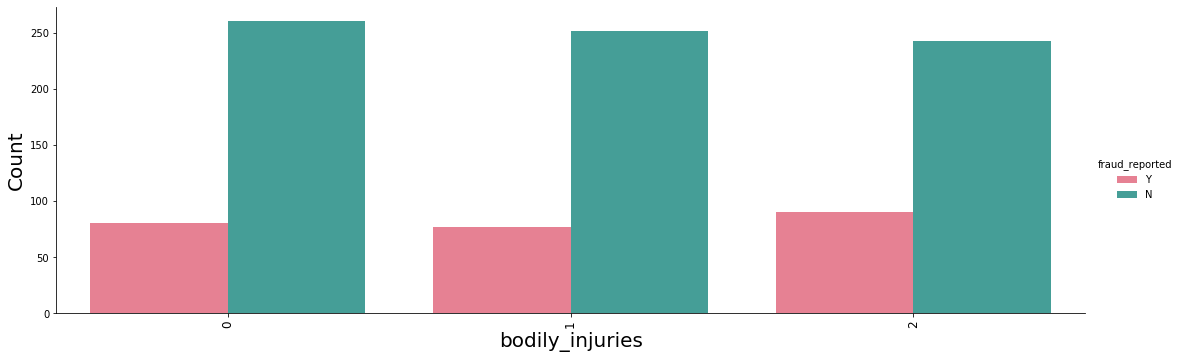

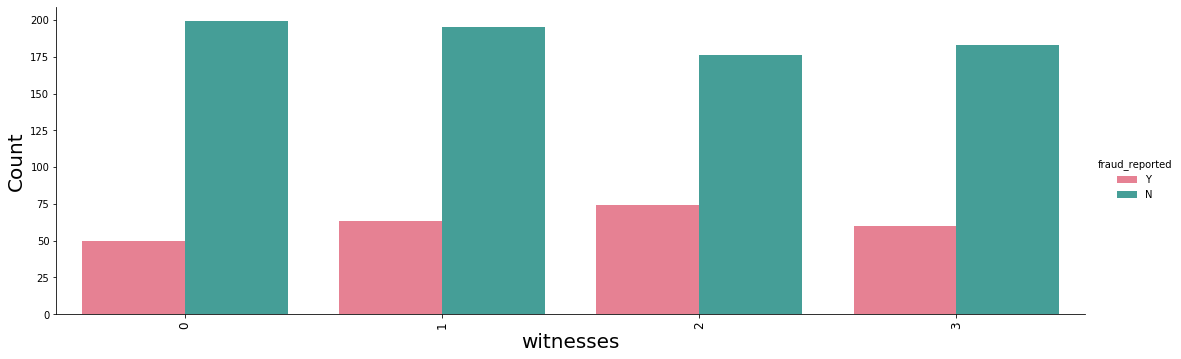

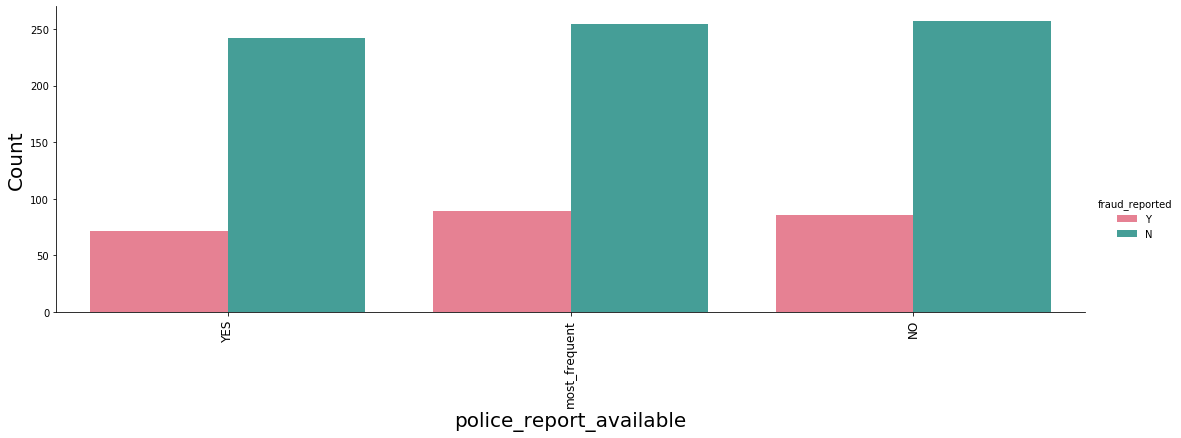

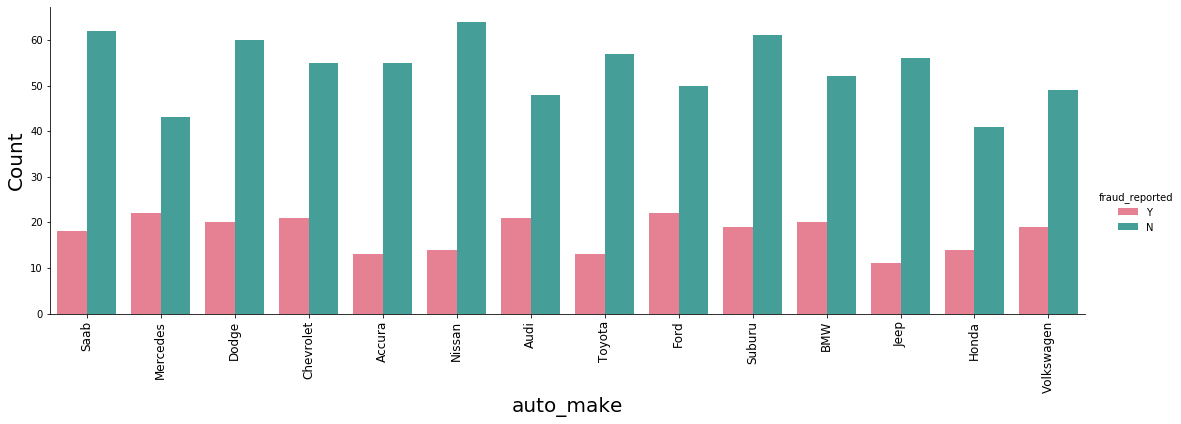

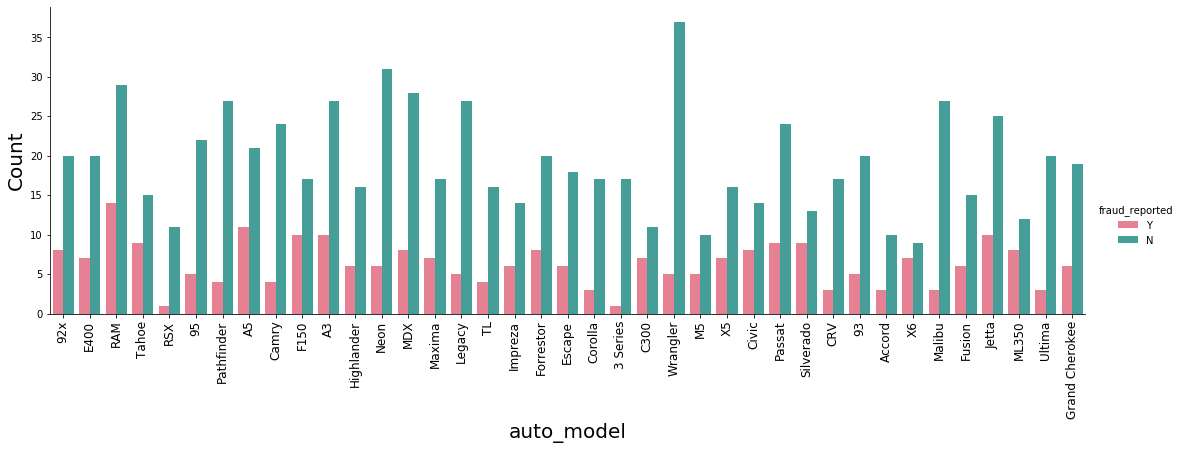

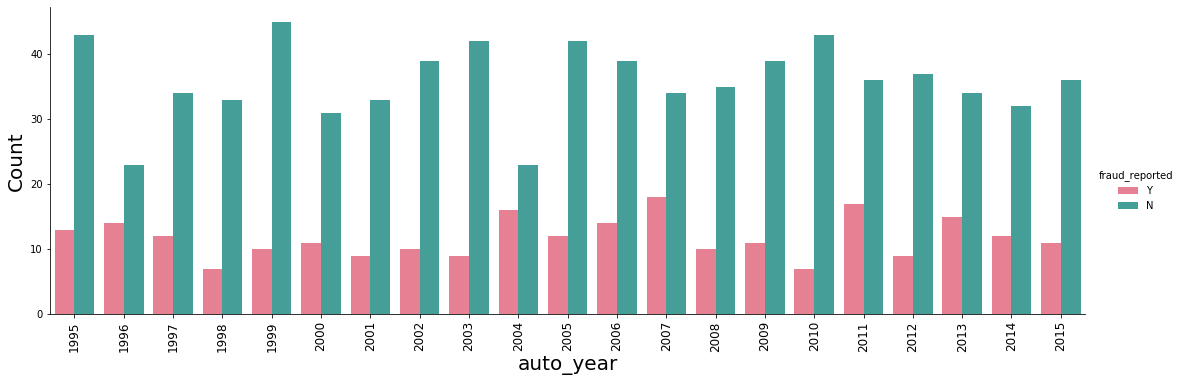

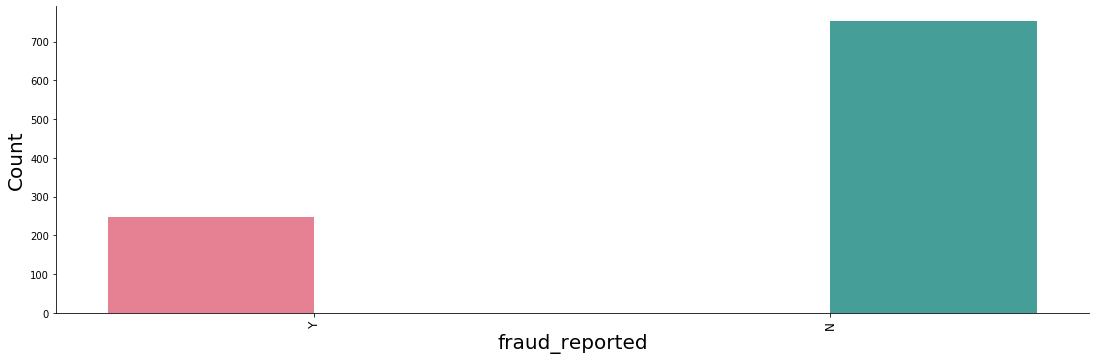

In [20]:
# Counting Number of instances and showing up them in graphs using a for loop...
for i in df.drop(['policy_number','incident_location','policy_annual_premium','insured_zip',
                  'capital-loss','policy_bind_date','total_claim_amount','injury_claim',
                  'property_claim','vehicle_claim','capital-gains','months_as_customer' ],axis=1).columns.values:
    sns.catplot(x=i,
                data=df,
                kind='count',
                height=5,
                aspect=3,
                palette='husl',
               hue='fraud_reported')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel('Count',fontsize=20)
    plt.xlabel(i,fontsize=20)

##### Information from the graph             

1) Number of persons who have done fraud increases as age increases upto age 41 and after that it starts decreases as age increases.                                   
2) In Policy 'IL' number of frauds are less as compared to the ploicy 'OH' and 'IN'.                  
3) Less frauds occured where policy_deductable is 1000.                  
4) More fraud occurs where umbrella_limit is 0.                 
5) Males do more fraud than females.                     
6) Less fraud is less where insured education level is High School.                       
7) Fraud is more where occupation 'isexec-managerial' and less where occupation is 'machine-op-inspct'.              
8) Fraud is more where insured_hobbies is 'Chess' and less where insured_hobbies is 'camping'.                       
9) Fraud is done more in single and mutli-vehicle collision.                  
10) Proportion of rear collision is more.                 
11) More fraud occurs when damage is Major.                       
12) Proportion where ambulance is contacted is more than fire, police etc.                
13) More Number of incidents are more where incident_statae is 'SC'.              

# Bivariant Analysis

In [21]:
# Lets get the list of numerical_features
num_col = df.dtypes[df.dtypes != 'object']
num_col

months_as_customer               int64
age                              int64
policy_number                    int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
capital-gains                    int64
capital-loss                     int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim                     int64
property_claim                   int64
vehicle_claim                    int64
auto_year                        int64
dtype: object

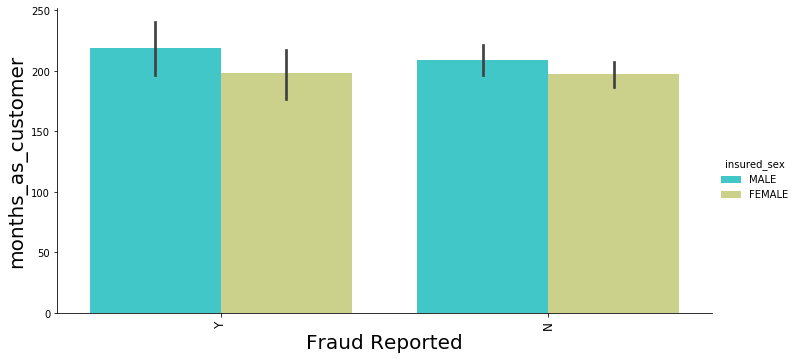

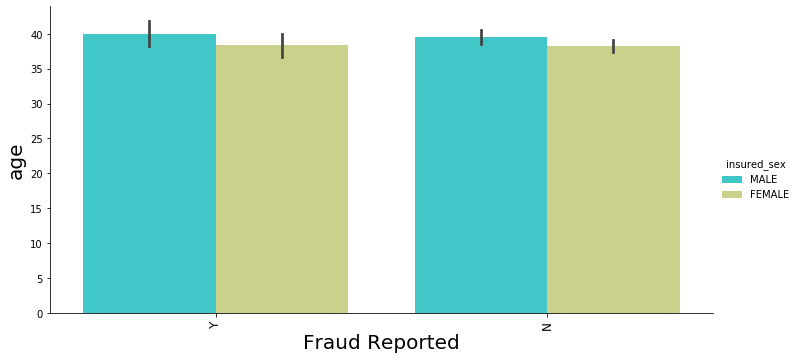

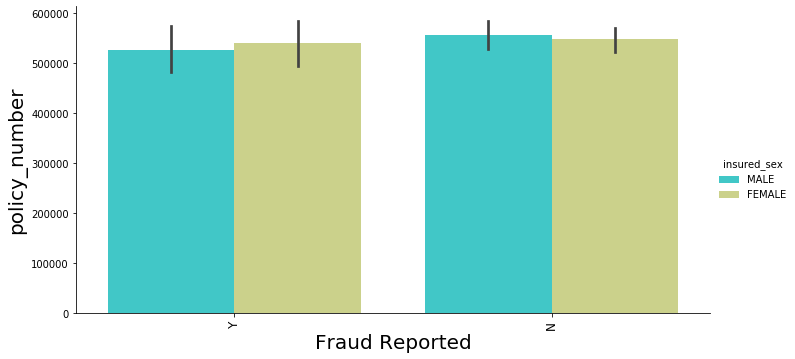

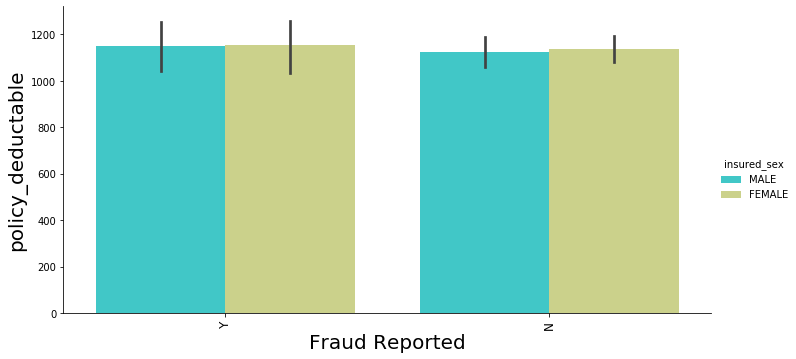

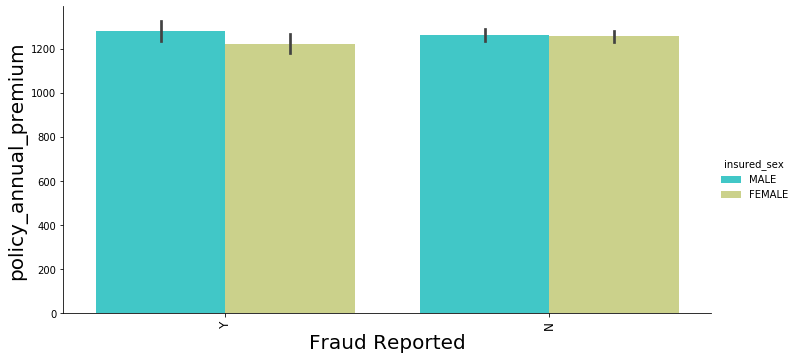

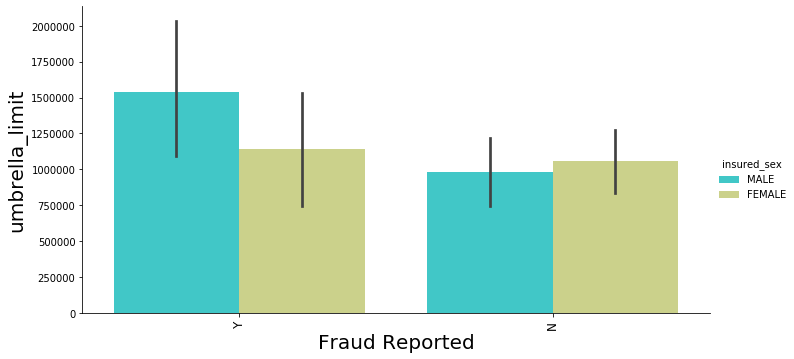

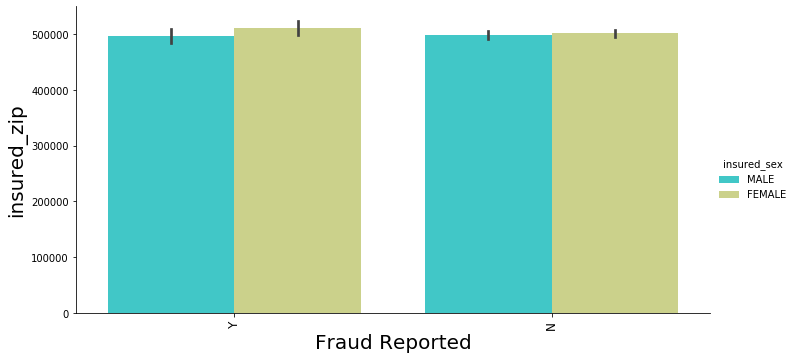

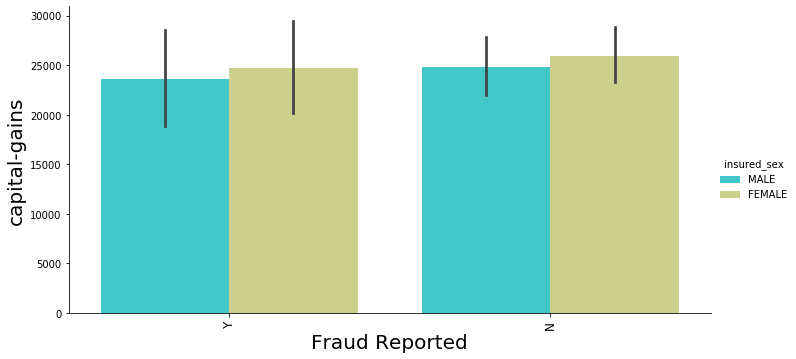

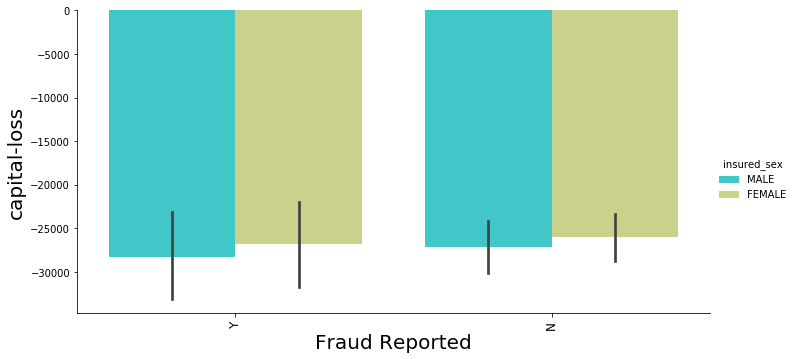

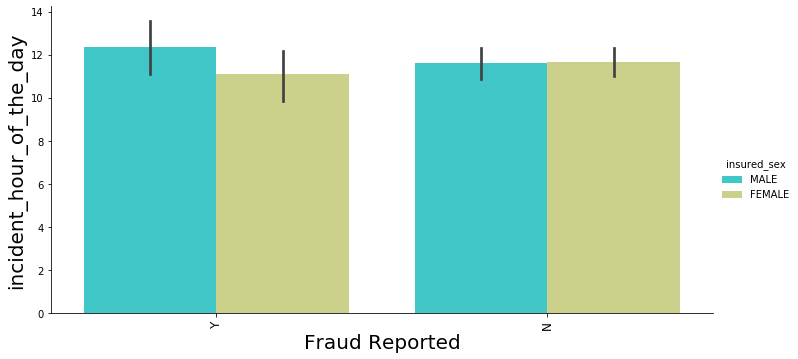

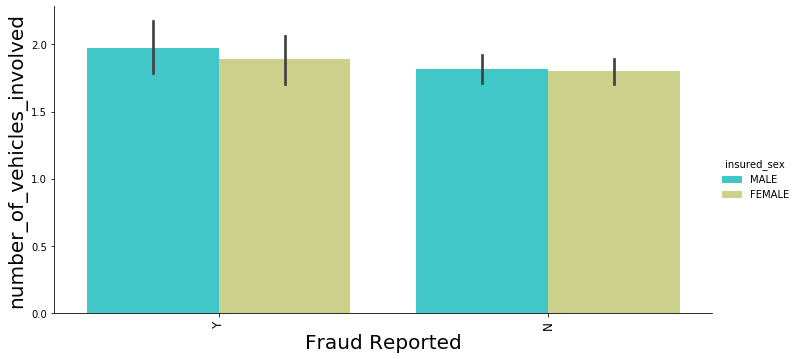

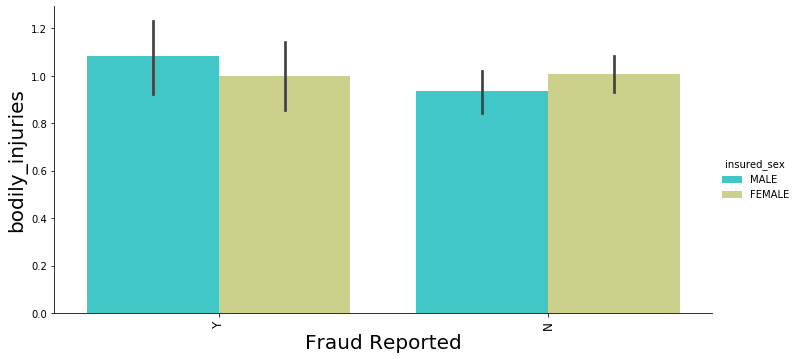

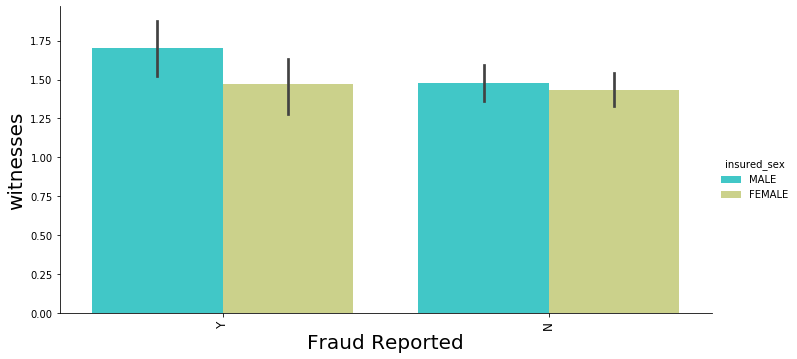

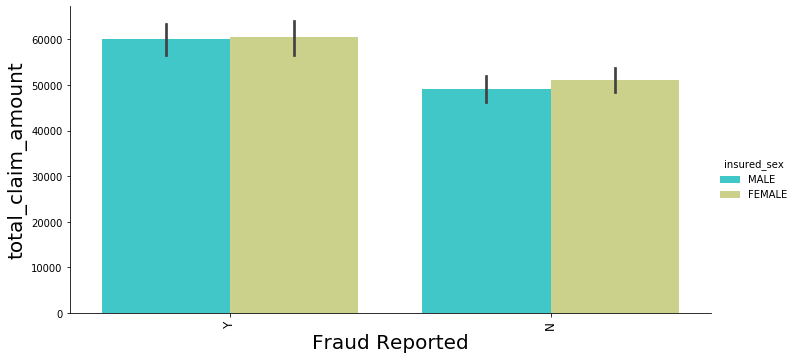

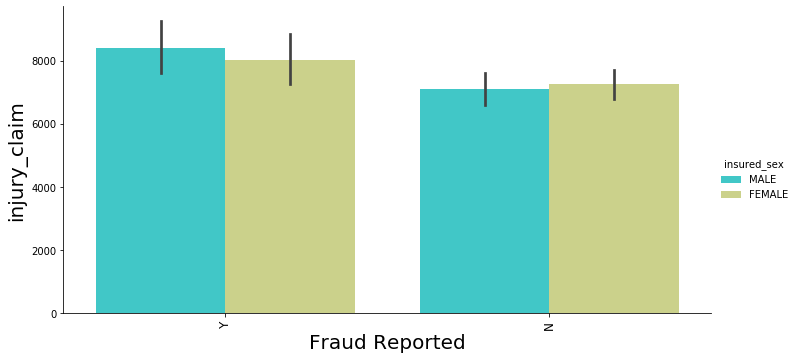

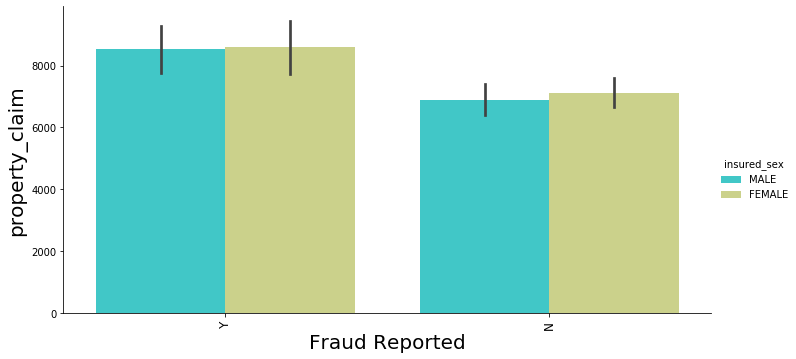

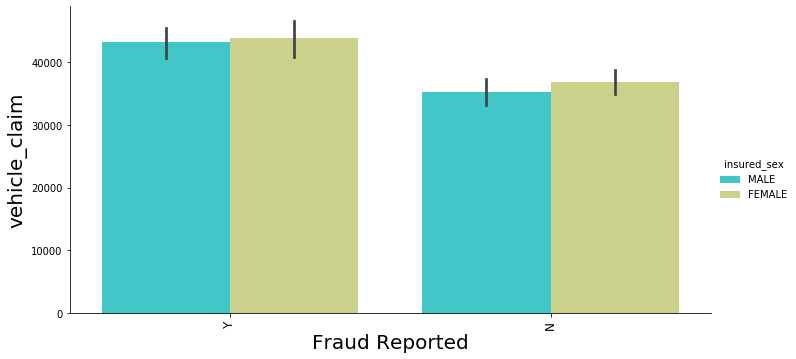

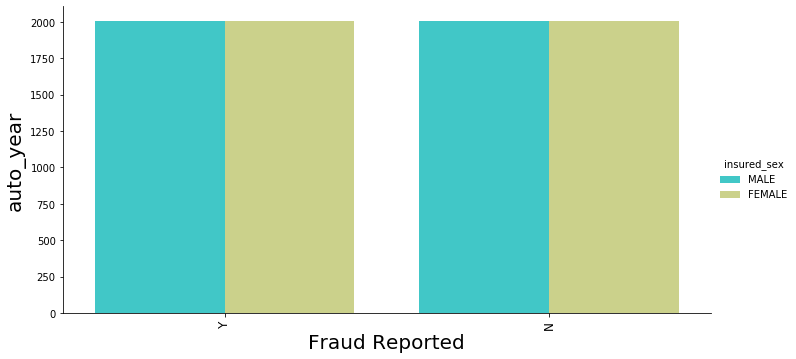

In [22]:
# for loop to plot graphs between fraud_reported and different features of the dataset....
for i in num_col.index.values:
    sns.catplot(y=i,
                data=df,
                x='fraud_reported',
                palette='rainbow',
                height=5,
                aspect=2,
                hue='insured_sex',
               kind='bar')
    plt.xticks(rotation=90,fontsize=12)
    plt.xticks(fontsize=12)
    plt.ylabel(i,fontsize=20)
    plt.xlabel('Fraud Reported',fontsize=20)


In [23]:
#Lets get the list of categorical_features
obj_col = df.dtypes[df.dtypes == 'object']
obj_col

policy_bind_date           object
policy_state               object
policy_csl                 object
insured_sex                object
insured_education_level    object
insured_occupation         object
insured_hobbies            object
insured_relationship       object
incident_date              object
incident_type              object
collision_type             object
incident_severity          object
authorities_contacted      object
incident_state             object
incident_city              object
incident_location          object
property_damage            object
police_report_available    object
auto_make                  object
auto_model                 object
fraud_reported             object
dtype: object

In [24]:
# Using Label Encoder so that object data can be convert to binary data so that data can be evaluated
from sklearn.preprocessing import LabelEncoder    
le=LabelEncoder()
for val in obj_col.index.values:
    df[val]=le.fit_transform(df[val].astype(str))
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0,466132,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,5000000,468176,...,0,2,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,5000000,430632,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,6000000,608117,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,6000000,610706,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0,431289,...,1,2,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0,608177,...,3,2,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,3000000,442797,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,5000000,441714,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [25]:
# Checking Skewness....
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                 0.126539
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


In [26]:
# Removing Skewness.........
for i in df.drop(['fraud_reported'],axis=1).columns:
    if df.skew().loc[i]>0.55:
        df[i]=np.log1p(df[i])

In [27]:
# dropping null values.... as there only 1 row having null values.
df.dropna(inplace=True)
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532,2,1,1000,1406.91,0.000000,13.052226,...,2,1,71610,6510,13020,52080,10,1,2004,1
1,228,42,342868,821,1,1,2000,1197.22,15.424949,13.056602,...,0,2,5070,780,780,3510,8,12,2007,1
2,134,29,687698,186,2,0,2000,1413.14,15.424949,12.973011,...,3,0,34650,7700,3850,23100,4,30,2007,0
3,256,41,227811,766,0,1,2000,1415.74,15.607270,13.318124,...,2,0,63400,6340,6340,50720,3,34,2014,1
4,228,44,367455,181,0,2,1000,1583.91,15.607270,13.322373,...,1,0,6500,1300,650,4550,0,31,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,487,2,2,1000,1310.80,0.000000,12.974536,...,1,2,87200,17440,8720,61040,6,6,2006,0
996,285,41,186934,129,0,0,1000,1436.79,0.000000,13.318223,...,3,2,108480,18080,18080,72320,13,28,2015,0
997,130,34,918516,509,2,1,500,1383.49,14.914123,13.000869,...,3,1,67500,7500,7500,52500,11,19,1996,0
998,458,62,533940,573,0,2,2000,1356.92,15.424949,12.998420,...,1,1,46980,5220,5220,36540,1,5,1998,0


In [28]:
#checking for outliers and removing them
from scipy.stats import zscore
z=np.abs(zscore(df))
print(df.shape)
df_new=df.loc[(z<3).all(axis=1)]
print(df_new.shape)

(999, 39)
(994, 39)


In [29]:
# checking skewnes again after removing skewness and outliers..
df.skew()

months_as_customer             0.364014
age                            0.479796
policy_number                  0.038736
policy_bind_date               0.003558
policy_state                  -0.024326
policy_csl                     0.087172
policy_deductable              0.476426
policy_annual_premium          0.005374
umbrella_limit                 1.494499
insured_zip                    0.781017
insured_sex                    0.150802
insured_education_level       -0.001183
insured_occupation            -0.059339
insured_hobbies               -0.060875
insured_relationship           0.078700
capital-gains                  0.477220
capital-loss                  -0.389813
incident_date                  0.005462
incident_type                  0.103399
collision_type                 0.128118
incident_severity              0.277762
authorities_contacted         -0.123464
incident_state                -0.150405
incident_city                  0.048366
incident_location             -0.001542


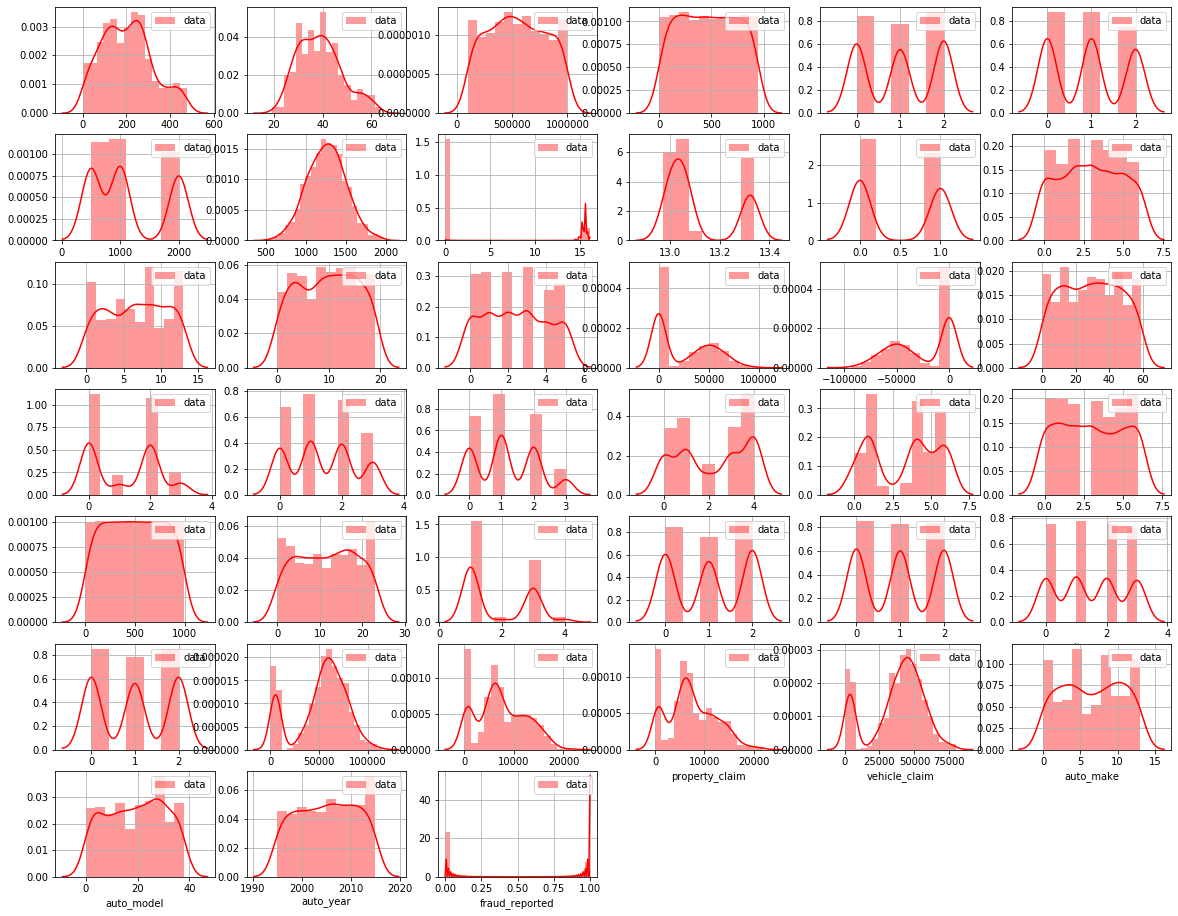

In [30]:
# Checking the Normal distribution of the dataset.
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_new.columns.values)):
    plt.subplot(7,6,i+1)
    sns.distplot(df_new[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout
# Distribution is looking well.

In [31]:
# Checking the correlation
df_new.corr().style.background_gradient(cmap='YlGnBu').set_precision(2)

(39.0, 0.0)

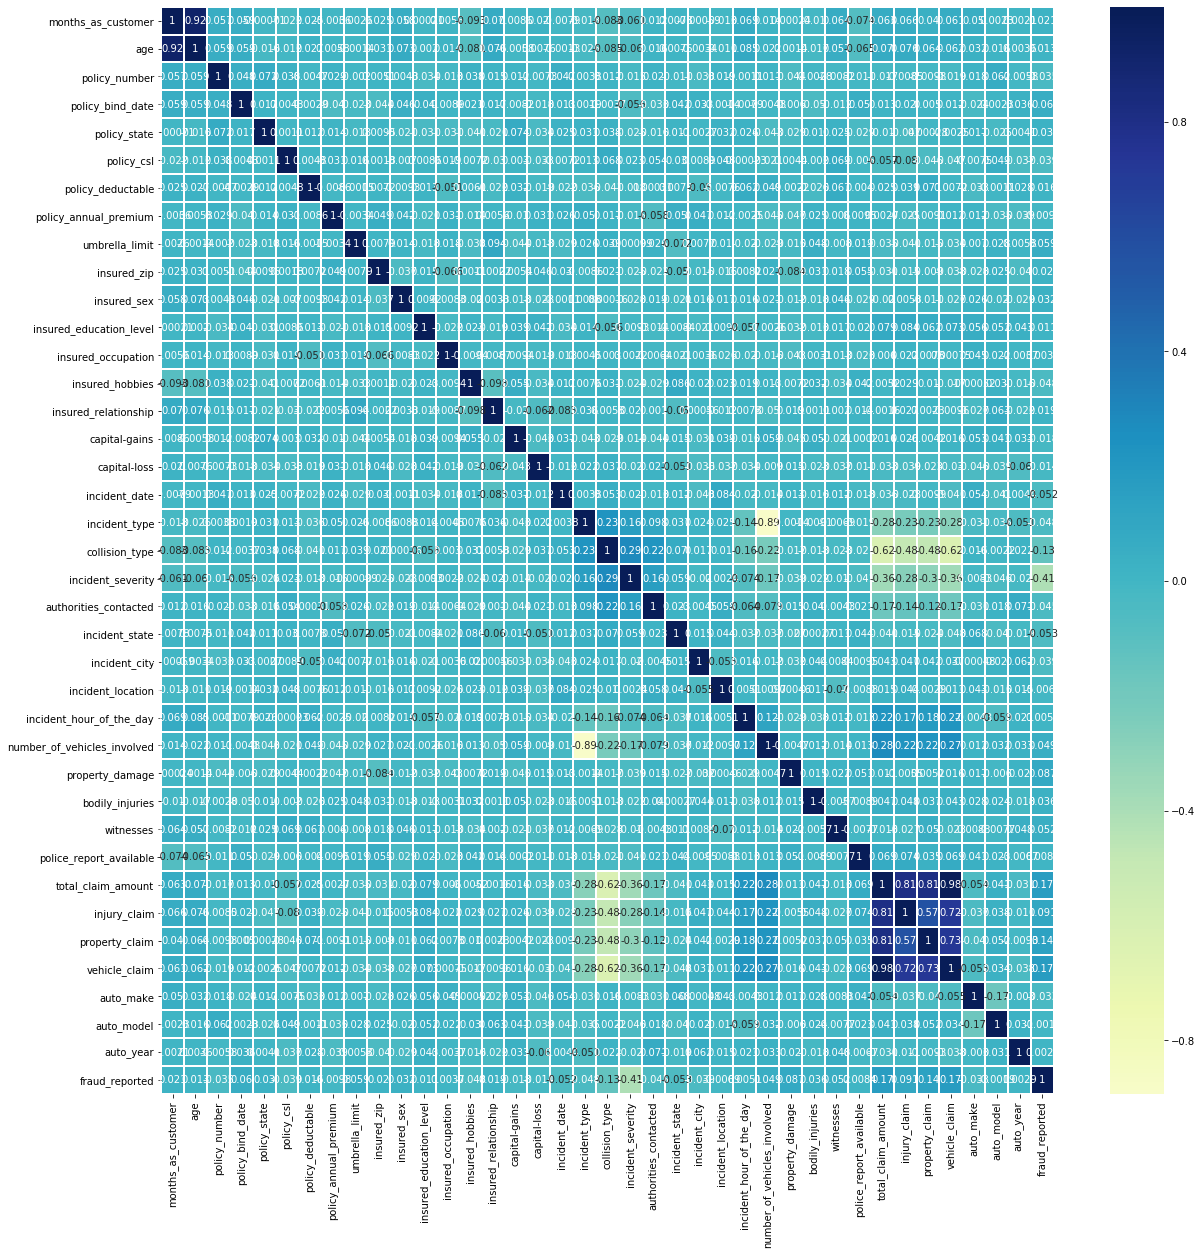

In [32]:
# Plotting Heatmap for correlation
fig, ax =plt.subplots(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True,linewidths=1,center=0,cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [33]:
# Dropping the target value and useless columns to fit the remaining data into standard scaler 
x1=df_new.drop(['fraud_reported','policy_bind_date','policy_number','incident_location',
                'insured_zip'],axis=1)
x1
print(x1.shape)

(994, 34)


In [34]:
# Setting up the Target value in variable y.
y=df_new['fraud_reported']
y.shape

(994,)

In [35]:
# scaling the input variable for further evaluation
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)
x
# Thus we can infer that dataset becomes scaled.

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,1.074398,0.986482,1.186952,0.062518,-0.224473,0.621540,-0.503347,1.075259,0.529660,-1.160879,...,0.007375,0.467780,0.000000,0.718811,-0.186833,1.179406,0.753092,0.855268,-1.645807,-0.185841
1,0.205226,0.330368,-0.016956,0.062518,1.410153,-0.250440,1.977316,1.075259,0.529660,-0.165482,...,-1.214335,-1.334442,1.207261,-1.806813,-1.361151,-1.376063,-1.822734,0.358838,-0.658359,0.313868
2,-0.611795,-1.091214,1.186952,-1.180347,1.410153,0.647447,1.977316,-0.930008,1.555942,1.078764,...,1.229084,1.368891,-1.207261,-0.684060,0.057048,-0.735108,-0.783812,-0.634022,0.957465,0.313868
3,0.448594,0.221015,-1.220865,0.062518,1.410153,0.658259,2.006638,-0.930008,1.555942,-1.409728,...,0.007375,0.467780,-1.207261,0.407188,-0.221674,-0.215245,0.680967,-0.882237,1.316537,1.479856
4,0.205226,0.549073,-1.220865,1.305384,-0.224473,1.357581,2.006638,1.075259,-1.522902,1.078764,...,-1.214335,-0.433331,-1.207261,-1.752535,-1.254582,-1.403205,-1.767580,-1.626882,1.047233,0.647007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,-1.750410,-0.107042,1.186952,1.305384,-0.224473,0.221874,-0.503347,-0.930008,1.042801,-1.160879,...,-1.214335,-0.433331,1.207261,1.310552,2.053183,0.281652,1.228271,-0.137592,-1.196967,0.147299
990,0.700654,0.221015,-1.220865,-1.180347,-0.224473,0.745794,-0.503347,-0.930008,1.555942,0.581065,...,1.229084,1.368891,1.207261,2.118266,2.184346,2.235834,1.826486,1.599913,0.777929,1.646425
991,-0.646562,-0.544452,1.186952,0.062518,-1.041787,0.524150,1.895165,-0.930008,1.042801,-1.409728,...,1.229084,1.368891,0.000000,0.562810,0.016059,0.026940,0.775366,1.103483,-0.029983,-1.518398
992,2.204321,2.517417,-1.220865,1.305384,1.410153,0.413660,1.977316,1.075259,-1.522902,-0.414331,...,-1.214335,-0.433331,0.000000,-0.216057,-0.451209,-0.449079,-0.071045,-1.378667,-1.286735,-1.185259


## Hyper Parameter Tuning

##### In this step I am doing Hyper parameter tuning so that i can find out the best parameters and based on these parameters setting up models for training...

In [36]:
# Function for GridSearch
from sklearn.model_selection import GridSearchCV
def grid_cv(mod,parameters,scoring):
    clf = GridSearchCV(mod,parameters,scoring, cv=5)
    clf.fit(x,y)
    print(clf.best_params_)

In [37]:
#.........Grid Search for DecisionTreeClassifier......
dt=DecisionTreeClassifier()
parameters={'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],"random_state":np.arange(1,20)}
grid_cv(dt,parameters,'accuracy')

{'criterion': 'gini', 'max_depth': 4, 'random_state': 15}


In [38]:
#.......Grid Search for GradientBoostingClassifier......
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
grid_cv(gbc,parameters,'accuracy')

{'learning_rate': 0.1, 'n_estimators': 100}


In [39]:
#.......Grid Search for KNeighborsClassifier.......
knn=KNeighborsClassifier()
parameters={"n_neighbors":np.arange(1,25)}
grid_cv(knn,parameters,'accuracy')

{'n_neighbors': 18}


In [40]:
#.........Grid Search for SVC........
svc=SVC()
parameters={"random_state":np.arange(1,20),'gamma': [1e-3, 1e-4],}
grid_cv(svc,parameters,'accuracy')

{'gamma': 0.001, 'random_state': 1}


In [41]:
#........Grid Search for LogisticRegression....
lr=LogisticRegression()
parameters={'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid_cv(lr,parameters,'accuracy')

{'C': 0.1}


In [42]:
#.......Grid Search for RandomForestClassifier.....
rf=RandomForestClassifier()
parameters={'n_estimators': [200,500, 700,1000],'max_features': ['auto', 'sqrt', 'log2']}
grid_cv(rf,parameters,'accuracy')

{'max_features': 'sqrt', 'n_estimators': 700}


In [43]:
#.....Grid Search for AdaBoostClassifier......
adc=AdaBoostClassifier()
parameters={'n_estimators': [200,500, 700,]}
grid_cv(adc,parameters,'accuracy')

{'n_estimators': 200}


## Model Training

In [48]:
#........Defining Instances For Differnt Models and putting best parameters in them.......
KNN=KNeighborsClassifier(n_neighbors=18)
SV=SVC(gamma=0.001,random_state=1)
LR=LogisticRegression(C=0.1)
DT=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=15)
GNB=GaussianNB()
GBC=GradientBoostingClassifier(learning_rate=0.01,n_estimators=500)
RF=RandomForestClassifier(max_features= 'sqrt', n_estimators= 700,)
AD=AdaBoostClassifier(n_estimators=200)
XG=XGBClassifier()

In [49]:
#     Putting Scikit-Learn machine learning Models in a list so that it can be used for further evaluation in loop.
models=[]
models.append(('KNeighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
models.append(('GaussianNB',GNB))
models.append(('GradientBoostingClassifier',GBC))
models.append(('RandomForestClassifier',RF))
models.append(('AdaBoostClassifier',AD))
models.append(('XGBClassifier',XG))

In [50]:
#        Function which will find best Random State and then calculate Maximum Accuracy Score corresponding to it
#                                  and print accuracy score in one go.
def max_acc_score(regr,x,y):
    max_acc_score=0
    final_r_state=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state,stratify=y)
        regr.fit(x_train,y_train)
        y_pred=regr.predict(x_test)
        acc_score=accuracy_score(y_test,y_pred)
        if acc_score > max_acc_score:
            max_acc_score=acc_score
            final_r_state=r_state
    print('Max Accuracy Score corresponding to Random State ', final_r_state, 'is:', max_acc_score)
    print('\n')
    return final_r_state

*************************** KNeighborsClassifier *****************************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')


Max Accuracy Score corresponding to Random State  49 is: 0.7688442211055276


Learning Score :  0.759748427672956
Accuracy Score :  0.7688442211055276
Cross Val Score :  0.7485355596784167
roc auc score :  0.5306122448979592


Classification Report:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       150
           1       1.00      0.06      0.12        49

    accuracy                           0.77       199
   macro avg       0.88      0.53      0.49       199
weighted avg       0.82      0.77      0.68       199



Confusion Matrix:
 [[150   0]
 [ 46   3]]





*************************** SVC *****************************


SVC(C=1.0, cache_size=200, class_weigh

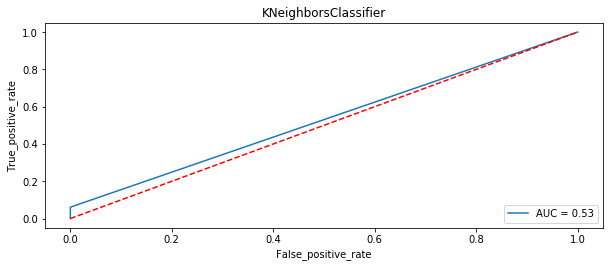

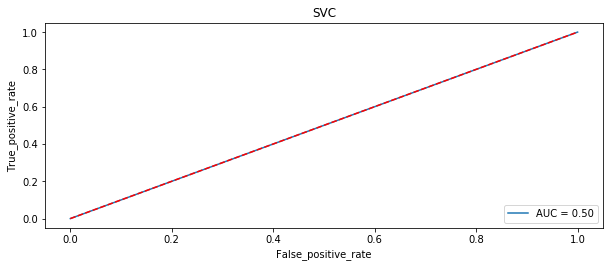

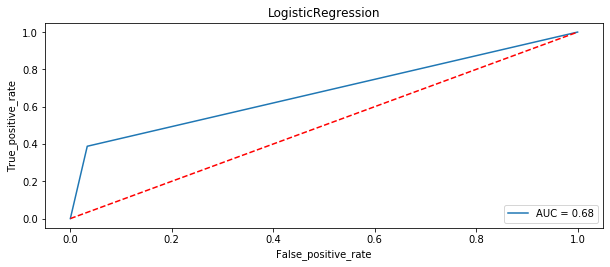

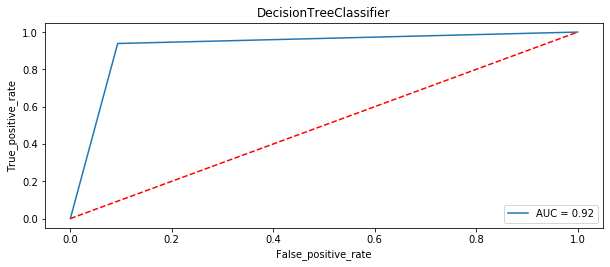

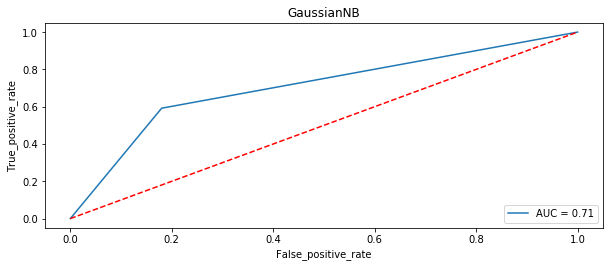

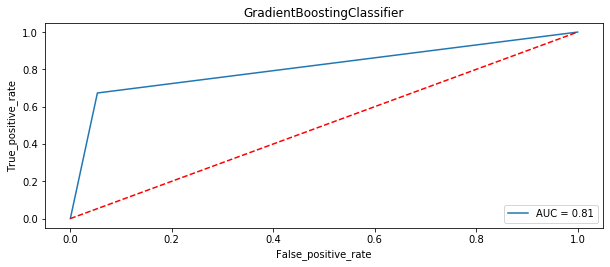

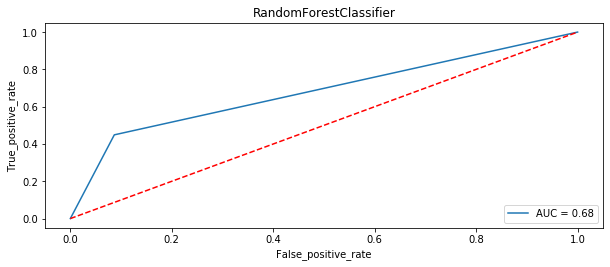

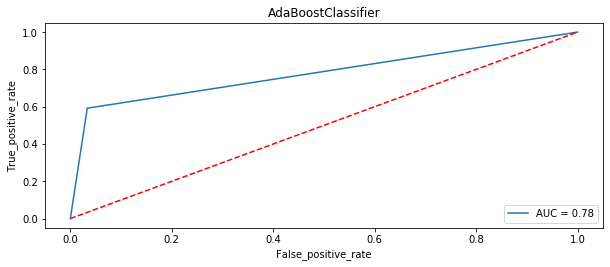

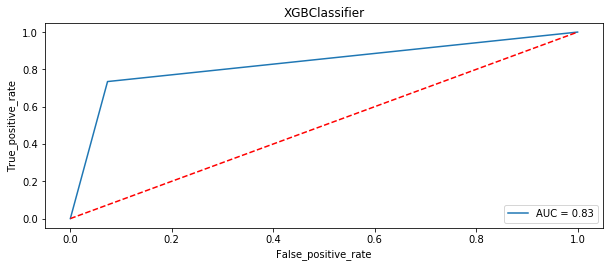

In [51]:
#     Lists to store model name, Learning score, Accuracy score, cross_val_score, Auc Roc score .
Model=[]
Score=[]
Acc_score=[]
cvs=[]
rocscore=[]
#            For Loop to Calculate Accuracy Score, Cross Val Score, Classification Report, Confusion Matrix

for name,model in models:
    print('***************************',name,'*****************************')
    print('\n')
    Model.append(name)
    print(model)
    print('\n')
    
     #        Now here I am calling a function which will calculate the max accuracy score for each model 
     #                               and return best random state.
    r_state=max_acc_score(model,x,y)
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state,stratify=y)
    model.fit(x_train,y_train)
#..............Learning Score...........
    score=model.score(x_train,y_train)
    print('Learning Score : ',score)
    Score.append(score*100)
    y_pred=model.predict(x_test)
    acc_score=accuracy_score(y_test,y_pred)
    print('Accuracy Score : ',acc_score)
    Acc_score.append(acc_score*100)
#................Finding Cross_val_score..................    
    cv_score=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('Cross Val Score : ', cv_score)
    cvs.append(cv_score*100)
    
#................Roc auc score...........................    
    false_positive_rate,true_positive_rate, thresholds=roc_curve(y_test,y_pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('roc auc score : ', roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('Classification Report:\n',classification_report(y_test,y_pred))
    print('\n')
    print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n\n')

In [52]:
# Making a Dataframe comprises of Differnt Calculated Scores :
result=pd.DataFrame({'Model': Model,'Learning Score': Score,'Accuracy Score': Acc_score,'Cross Val Score':cvs,
                     'Roc_Auc_curve':rocscore}) 
result.style.background_gradient(cmap='YlGnBu')

,Model,Learning Score,Accuracy Score,Cross Val Score,Roc_Auc_curve
0,KNeighborsClassifier,75.9748,76.8844,74.8536,53.0612
1,SVC,75.2201,75.3769,75.2536,50
2,LogisticRegression,78.8679,82.4121,77.7739,67.7211
3,DecisionTreeClassifier,84.4025,91.4573,83.8207,92.2721
4,GaussianNB,73.2075,76.3819,71.8485,70.5918
5,GradientBoostingClassifier,93.9623,87.9397,83.0176,81.0068
6,RandomForestClassifier,100,79.8995,76.977,68.1156
7,AdaBoostClassifier,92.4528,87.4372,80.1044,77.9252
8,XGBClassifier,100,87.9397,82.2044,83.068


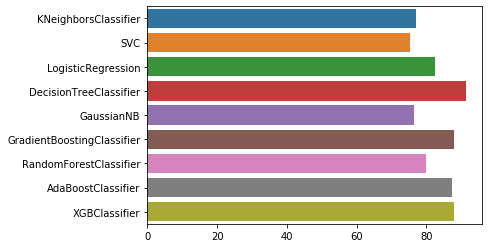

In [53]:
# visualisation of Accuracy Score
sns.barplot(y=Model,x=Acc_score)

## After all this process conclusion is that DecisionTreeClassifier is performing well in terms of Accuracy score, Cross val score and Roc_Auc score.

In [55]:
# Using DecisionTreeClassifier for final model...
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=80,test_size=.20,stratify=y)
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=5,random_state=15)
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
dtcpred=dtc.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test,dtcpred))
print('Confusion Matrix:',confusion_matrix(y_test,dtcpred))
print('Classification Report:','\n',classification_report(y_test,dtcpred))

Accuracy Score: 0.914572864321608
Confusion Matrix: [[136  14]
 [  3  46]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.91      0.94       150
           1       0.77      0.94      0.84        49

    accuracy                           0.91       199
   macro avg       0.87      0.92      0.89       199
weighted avg       0.93      0.91      0.92       199



(2.0, 0.0)

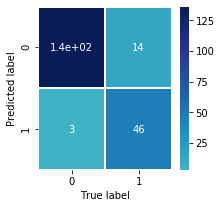

In [56]:
# Confusion matrix Visualization
fig, ax =plt.subplots(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test, dtcpred),annot=True,linewidths=1,center=0,cmap='YlGnBu')
plt.xlabel("True label")
plt.ylabel("Predicted label")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

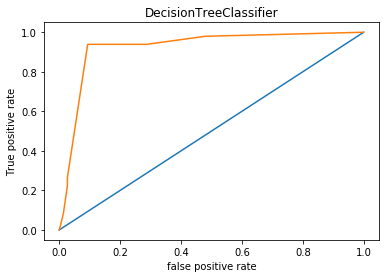

roc_auc_score =  0.9243537414965987


In [57]:
# Make predictions with probabilities
y_probs = dtc.predict_proba(x_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('false positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
print('roc_auc_score = ',roc_auc_score(y_test, y_probs))

In [58]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=dtcpred
test
# On the lest side values are those which are taken by machine for test...

,fraud_reported,Predicted values
729,1,1
827,0,0
555,1,1
596,0,0
779,0,0
...,...,...
361,1,1
50,0,0
978,0,0
933,0,0


In [59]:
# Saving the Predicted values in csv file
test.to_csv('Project_16_Automobile_Insurance_Fraud.csv') 

In [60]:
# Dumping Data in pickle file.
from sklearn.externals import joblib
joblib.dump(dtc,'Project_16_Automobile_Insurance_Fraud.pkl')

['Project_16_Automobile_Insurance_Fraud.pkl']

## Conclusion:          

1) Number of persons who have done fraud increases as age increases upto age 41 and after that it starts decreases as age increases.                                                               
2) In Policy 'IL' number of frauds are less as compared to the ploicy 'OH' and 'IN'.                                      
3) Less frauds occured where policy_deductable is 1000.                                 
4) More fraud occurs where umbrella_limit is 0.                                    
5) Males do more fraud than females.                                               
6) Less fraud is less where insured education level is High School.                                             
7) Fraud is more where occupation 'isexec-managerial' and less where occupation is 'machine-op-inspct'.                         
8) Fraud is more where insured_hobbies is 'Chess' and less where insured_hobbies is 'camping'.                                
9) Fraud is done more in single and mutli-vehicle collision.                   
10) Proportion of rear collision is more.                            
11) More fraud occurs when damage is Major.                                                 
12) Proportion where ambulance is contacted is more than fire, police etc.                                  
13) More Number of incidents are more where incident_statae is 'SC'.                         

## Steps Followed:                    

1) Data Analysis.             
2) EDA Analysis.                                  
3) Best parameters are found using Gridsearch cv and applied to models.                       
4) Best parameters are applied to each models and machine is trained for each models to find Best Accuracy Score.     
5) AUC ROC Curves are made for each model.                 
6) A Result table is made comprises of accuracy,cross_val,auc_roc scores of each model.   
7) DecisionTreeClassifier is used to train the model finally as it's accuracy score is best among the rest of the models.   
8) Predicted values are saved in Project_16_Automobile_Insurance_Fraud.csv file.             
9) Pickle file is named with Project_16_Automobile_Insurance_Fraud.pkl         